# Классификация

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn-pastel')

## Потребность клиента в страховке

Загрузим датасет и посмотрим на данные.

- `id` - уникальный номер
- `Gender` - пол владельца
- `Age` - Возраст владельца
- `Driving_License` - Водительское удостоверение
- `Region_Code` - Код региона
- `Previously_Insured` - Ранее застрахован
- `Vehicle_Age` - Возраст автомобиля
- `Vehicle_Damage` - Повреждение автомобиля
- `Annual_Premium` - Годовая премия
- `Policy_Sales_Channel` - Канал продаж
- `Vintage` - Винтажный автомобиль или нет
- `Response` - Результат, потребуется страховка или нет

Используем библиотеку `pandas_profiling` для красивого вывода сразу
многих характеристик датасета.

In [3]:
train = pd.read_csv("lesson_20_08/train.csv")
test = pd.read_csv("lesson_20_08/test.csv")

train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,213892,Male,48,1,35.0,1,1-2 Year,No,24922.0,26.0,86,0
1,269011,Male,58,1,28.0,0,1-2 Year,Yes,63541.0,26.0,57,0
2,31464,Male,44,1,28.0,1,1-2 Year,No,30027.0,26.0,286,0
3,86379,Female,22,1,8.0,0,< 1 Year,Yes,35039.0,152.0,180,0
4,456843,Male,24,1,6.0,1,< 1 Year,No,24149.0,152.0,17,0


In [4]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Конечно, можно воспользоваться стандартными методами и сделать все "ручками".

Например, проверить наличие пустых значений (там где есть `null`).

In [5]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

И информацию о наборе данных в целом

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    229292 non-null  int64  
 1   Gender                229292 non-null  object 
 2   Age                   229292 non-null  int64  
 3   Driving_License       229292 non-null  int64  
 4   Region_Code           229292 non-null  float64
 5   Previously_Insured    229292 non-null  int64  
 6   Vehicle_Age           229292 non-null  object 
 7   Vehicle_Damage        229292 non-null  object 
 8   Annual_Premium        229292 non-null  float64
 9   Policy_Sales_Channel  229292 non-null  float64
 10  Vintage               229292 non-null  int64  
 11  Response              229292 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 21.0+ MB


Визуализируем данные

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,90908,95126,5636
1,29368,4509,3745


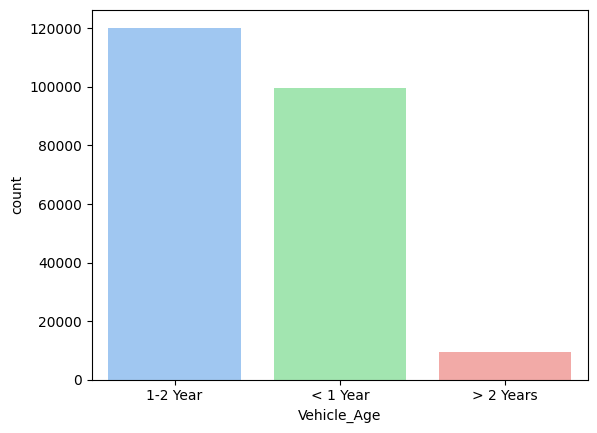

In [7]:
sns.countplot(train['Vehicle_Age'])
pd.crosstab(train['Response'], train['Vehicle_Age'])

In [ ]:
sns.countplot(train['Gender'])
pd.crosstab(train['Response'], train['Gender'])

In [ ]:
sns.countplot(train['Vehicle_Damage'])
pd.crosstab(train['Response'], train['Vehicle_Damage'])

In [ ]:
pd.crosstab(train['Response'], train['Driving_License'])

In [ ]:
pd.crosstab(train['Response'], train['Previously_Insured'])

Один из основных графиков - распределение результирующей переменной

<AxesSubplot:xlabel='Response', ylabel='count'>

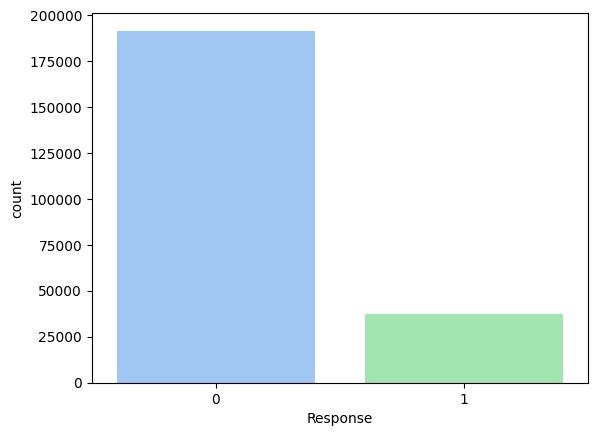

In [8]:
sns.countplot(x="Response", data=train)

Попробуем избавиться от дизбаланса

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [10]:
x_for_res = train.copy()
y_for_res = train['Response']
del x_for_res['Response']

In [11]:
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x_for_res, y_for_res)

<AxesSubplot:xlabel='Response', ylabel='count'>

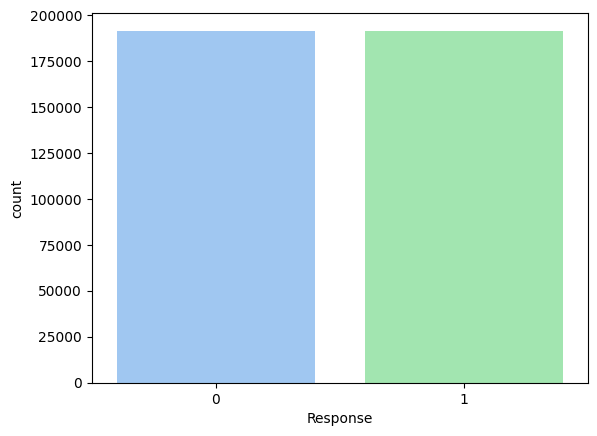

In [12]:
sns.countplot(y_resampled)

In [13]:
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_for_res, y_for_res)

<AxesSubplot:xlabel='Response', ylabel='count'>

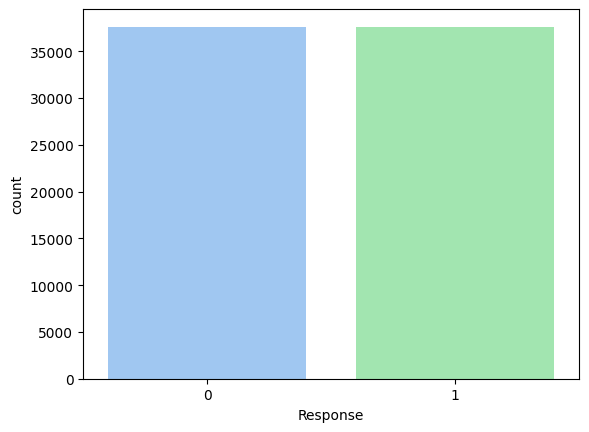

In [14]:
sns.countplot(y_resampled)

С текстом работать не очень приятно. Подготовим данные для более удобной
работы.

Заменим в признаке `Vehicle_Damage` `No` на 0 и `Yes` на 1.

Аналогичную операцию произведем с признаком `Gender`.

In [15]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map(
    {'No' : 0, 'Yes' : 1}
)

d = {'Male' : 0, 'Female': 1}
train['Gender'] = train['Gender'].replace({'Male' : 0, 'Female': 1})

# get_dummies - Преобразует категориальные переменные
# в фиктивные/индикаторные переменные.
train = pd.get_dummies(train)

# Снова смотрим info, чтобы убедиться что все получилось
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229292 entries, 0 to 229291
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     229292 non-null  int64  
 1   Gender                 229292 non-null  int64  
 2   Age                    229292 non-null  int64  
 3   Driving_License        229292 non-null  int64  
 4   Region_Code            229292 non-null  float64
 5   Previously_Insured     229292 non-null  int64  
 6   Vehicle_Damage         229292 non-null  int64  
 7   Annual_Premium         229292 non-null  float64
 8   Policy_Sales_Channel   229292 non-null  float64
 9   Vintage                229292 non-null  int64  
 10  Response               229292 non-null  int64  
 11  Vehicle_Age_1-2 Year   229292 non-null  uint8  
 12  Vehicle_Age_< 1 Year   229292 non-null  uint8  
 13  Vehicle_Age_> 2 Years  229292 non-null  uint8  
dtypes: float64(3), int64(8), uint8(3)
me

In [16]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,213892,0,48,1,35.0,1,0,24922.0,26.0,86,0,1,0,0
1,269011,0,58,1,28.0,0,1,63541.0,26.0,57,0,1,0,0
2,31464,0,44,1,28.0,1,0,30027.0,26.0,286,0,1,0,0
3,86379,1,22,1,8.0,0,1,35039.0,152.0,180,0,0,1,0
4,456843,0,24,1,6.0,1,0,24149.0,152.0,17,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229287,50272,0,72,1,28.0,1,0,39183.0,125.0,241,0,1,0,0
229288,254780,0,21,1,24.0,1,0,2630.0,152.0,132,0,0,1,0
229289,380053,0,43,1,29.0,0,1,2630.0,156.0,235,0,0,0,1
229290,69958,1,20,1,47.0,1,1,30960.0,160.0,16,0,0,1,0


Посмотрим на некоторые характеристики наших признаков

In [17]:
train.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000,229292.000000
mean,234460.942475,0.461063,38.554987,0.998138,26.420207,0.489062,0.480872,30730.076549,111.923669,154.194425,0.164079,0.524554,0.434533,0.040913
std,139490.034283,0.498483,15.231658,0.043114,13.191474,0.499881,0.499635,17054.686028,54.308261,83.727049,0.370348,0.499398,0.495697,0.198089
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,115085.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24564.000000,26.000000,82.000000,0.000000,0.000000,0.000000,0.000000
50%,230564.500000,0.000000,36.000000,1.000000,28.000000,0.000000,0.000000,31709.000000,140.000000,154.000000,0.000000,1.000000,0.000000,0.000000
75%,345683.500000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39470.000000,152.000000,227.000000,0.000000,1.000000,1.000000,0.000000
max,508144.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000


![one hot encoding](onehot.png)

Кроме этого некоторые методы плохо работают, когда данные имеют разный разброс.

Например, возраст и винтаж сильно расходятся.

Для этого есть метод стандартизации и нормализации:
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# стандартизация
ss = StandardScaler()
num_feat = ['Age', 'Vintage']
transform_data = ss.fit_transform(train[num_feat])

# Преобразует, учитывая выбросы
rs = RobustScaler()
transform_annual = rs.fit_transform(train[['Annual_Premium']])

Для понимания происходящего посмотрим на данные после преобразования

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

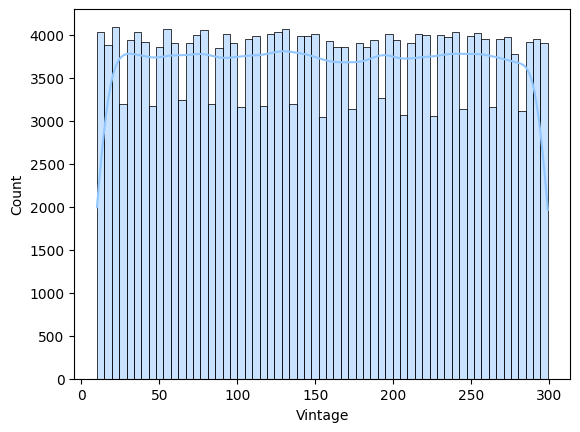

In [19]:
sns.histplot(train['Vintage'], kde=True)

<AxesSubplot:ylabel='Count'>

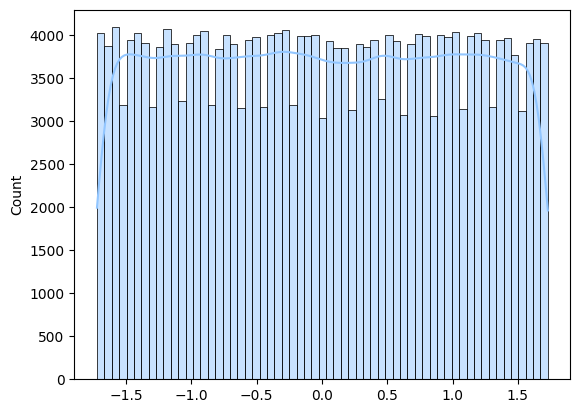

In [20]:
sns.histplot(transform_data[:, 1], kde=True)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

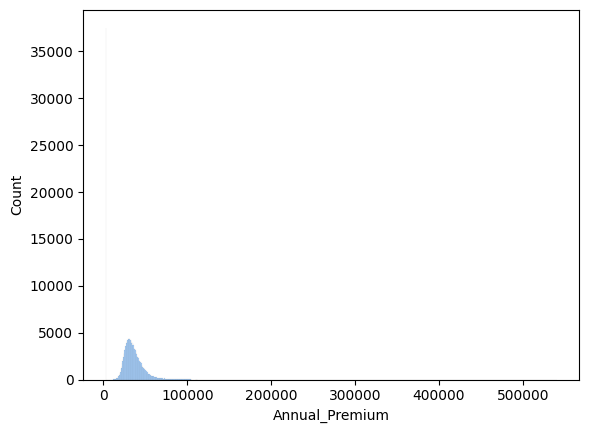

In [21]:
sns.histplot(train['Annual_Premium'])

<AxesSubplot:ylabel='Count'>

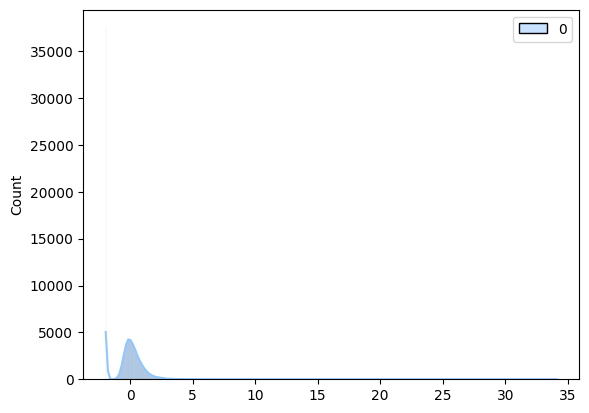

In [22]:
sns.histplot(transform_annual, kde=True)

In [23]:
train[num_feat] = transform_data
train[['Annual_Premium']] = transform_annual

Для обучения оставим только числовые признаки

In [24]:
train_numeric = train.select_dtypes(include=[np.number])
numeric_columns = train_numeric.columns.values
numeric_columns

array(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'], dtype=object)

Удалим из тренировочного набора результирующую переменную

In [25]:
x = train[numeric_columns]
y = train['Response']
del x['Response']

Разделим на тренировочную и тестовую выборки

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x, y, random_state=42, train_size=0.8, stratify=y, shuffle=True
)

Перейдем к классификации. Будем экспериментировать с разными методами.

Попробуем:
- k-ближайших соседей `KNeighborsClassifier`
- логистическую регрессию `LogisticRegression`
- метод опорных векторов `sklearn.svm.SVC` (https://scikit-learn.org/stable/modules/svm.html)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve

Еще нам понадобиться метод для рисования ROC-AUC графика

In [28]:
from sklearn.metrics import plot_roc_curve, ConfusionMatrixDisplay

#### KNN

In [29]:
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(x_train, y_train)

y_train_predicted_knn = knn_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_knn = knn_baseline.predict_proba(x_val)[:, 1]

roc_knn_train = roc_auc_score(y_train, y_train_predicted_knn)
roc_knn_val = roc_auc_score(y_val, y_val_predicted_knn)

print(f"ROC AUC на обучающей {roc_knn_train}")
print(f"ROC AUC на тестовой {roc_knn_val}")


ROC AUC на обучающей 0.8770938024665562
ROC AUC на тестовой 0.6419417500535827


Визуализируем ROC-AUC кривую

https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F


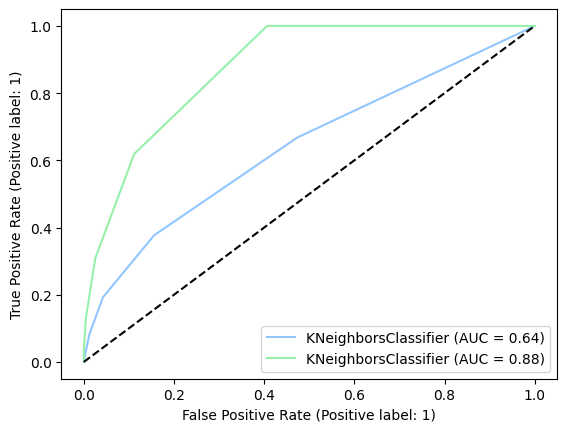

In [30]:
# нарисуем график roc-auc кривой для валидационной выборки
graph = plot_roc_curve(knn_baseline, x_val, y_val)
# добавим к нему график roc-auc кривой для тестовой выборки
plot_roc_curve(knn_baseline, x_train, y_train, ax=graph.ax_)
# добавим "критический" уровень для лучшего визуального восприятия
plt.plot([0, 1], [0, 1], "k--")

Посмотрим на еще одну метрику - матрицу ошибок

Числовые значения:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

![матрица ошибок](matrix.png)

Наглядно:

![матрица ошибок пример](confusion_matrix_example.png)

https://hranalytic.ru/kak-ponyat-matrica-nesootvetstvij-confusion-matrix/

Text(0.5, 0, 'Предсказанные значения')

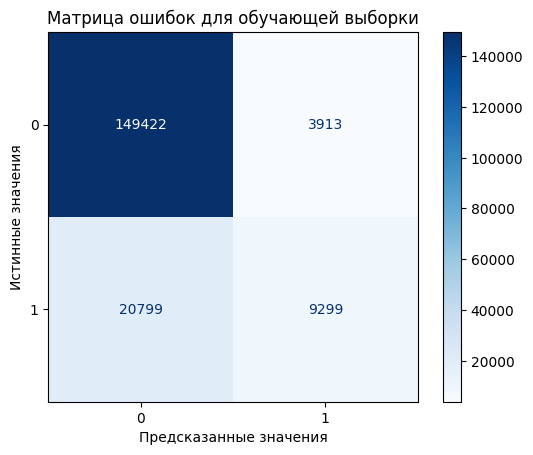

In [31]:
display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Матрица ошибок для обучающей выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

Text(0.5, 0, 'Предсказанные значения')

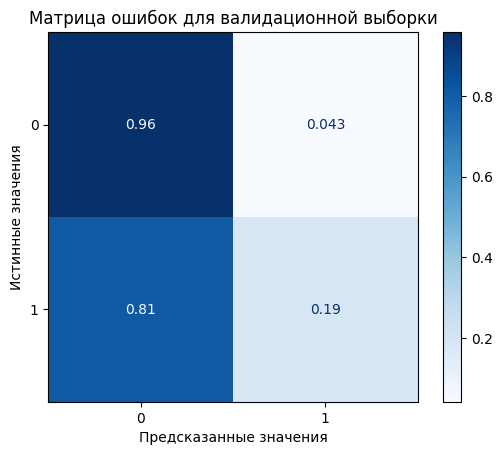

In [32]:
display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_val,
    y_val,
    cmap=plt.cm.Blues,
    normalize='true',
)
display.ax_.set_title('Матрица ошибок для валидационной выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

Попробуем поиграться с параметрами

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35, metric='manhattan')
knn.fit(x_train, y_train)

y_train_predicted_knn = knn.predict_proba(x_train)[:, 1]
y_val_predicted_knn = knn.predict_proba(x_val)[:, 1]

roc_knn_train = roc_auc_score(y_train, y_train_predicted_knn)
roc_knn_val = roc_auc_score(y_val, y_val_predicted_knn)

print(f"ROC AUC на обучающей {roc_knn_train}")
print(f"ROC AUC на тестовой {roc_knn_val}")

In [ ]:
# нарисуем график roc-auc кривой для валидационной выборки
graph = plot_roc_curve(knn, x_val, y_val)
# добавим к нему график roc-auc кривой для тестовой выборки
plot_roc_curve(knn, x_train, y_train, ax=graph.ax_)
# добавим "критический" уровень для лучшего визуального восприятия
plt.plot([0, 1], [0, 1], "k--")

Создадим функцию для рисования графика, что бы постоянно не копипастить код

In [38]:
def my_roc_curve(estimator, x_val, y_val, x_train, y_train):
    # нарисуем график roc-auc кривой для валидационной выборки
    graph = plot_roc_curve(estimator, x_val, y_val)
    # добавим к нему график roc-auc кривой для тестовой выборки
    plot_roc_curve(estimator, x_train, y_train, ax=graph.ax_)
    # добавим "критический" уровень для лучшего визуального восприятия
    plt.plot([0, 1], [0, 1], "k--")

#### Логистическая регрессия

https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F

![Логистическая регрессия](logistic.png)

In [ ]:
log_baseline = LogisticRegression(n_jobs=-1, random_state=42)
log_baseline.fit(x_train, y_train)

y_train_predicted_lr = log_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_lr = log_baseline.predict_proba(x_val)[:, 1]

roc_lr_train = roc_auc_score(y_train, y_train_predicted_lr)
roc_lr_val = roc_auc_score(y_val, y_val_predicted_lr)

print(f"ROC AUC на обучающей {roc_lr_train}")
print(f"ROC AUC на тестовой {roc_lr_val}")

In [ ]:
my_roc_curve(log_baseline, x_val, y_val, x_train, y_train)

Попробуем поиграть с параметрами

- `C` - обратный параметр регуляризации, чем выше, тем обучающие данные имеют больший вес, т.е. хорошо отражают реальный мир
- `penalty` - вид регуляризации (https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0))
- `solver` - алгоритм оптимизации

In [ ]:
logit = LogisticRegression(
    n_jobs=-1, random_state=42, C=100, penalty='l2', solver='newton-cg'
)
logit.fit(x_train, y_train)

y_train_predicted_lr = logit.predict_proba(x_train)[:, 1]
y_val_predicted_lr = logit.predict_proba(x_val)[:, 1]

roc_lr_train = roc_auc_score(y_train, y_train_predicted_lr)
roc_lr_val = roc_auc_score(y_val, y_val_predicted_lr)

print(f"ROC AUC на обучающей {roc_lr_train}")
print(f"ROC AUC на тестовой {roc_lr_val}")

In [ ]:
my_roc_curve(logit, x_val, y_val, x_train, y_train)

In [ ]:
display = ConfusionMatrixDisplay.from_estimator(
    logit,
    x_val,
    y_val,
    cmap=plt.cm.Blues,
    normalize='true',
)
display.ax_.set_title('Матрица ошибок для валидационной выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

#### Машина опорных векторов

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2

![SVM](svm.png)

Ремарка по скорости работы:

https://stackoverflow.com/questions/40077432/why-is-scikit-learn-svm-svc-extremely-slow

In [ ]:
svc_baseline = SVC(max_iter=50, probability=True)
svc_baseline.fit(x_train, y_train)

y_train_predicted_svc = svc_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_svc = svc_baseline.predict_proba(x_val)[:, 1]

roc_svc_train = roc_auc_score(y_train, y_train_predicted_svc)
roc_svc_val = roc_auc_score(y_val, y_val_predicted_svc)

print(f"ROC AUC на обучающей {roc_svc_train}")
print(f"ROC AUC на тестовой {roc_svc_val}")